#**Facebook Group Analysis**

Para este análisis se está trabajando con un dataset obtenido haciendo Web Scraping de un grupo de Facebook llamado "Entel recargas y plan post pago". Este es un grupo falso donde se están realizando estafas a otros usuarios.

Nota: En la elaboración para obtener la data se empleó la librería [facebook_scraper](https://pypi.org/project/facebook-scraper/) que nos permite obtener, mediante la función get_post(), la siguiente información:

*   username
*   user_id
*   user_url
*   post_id
*   time
*   post_url
*   text
*   image
*   video
*   link
*   shared_text' 
*   likes 
*   comments
*   shares

In [83]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
#Importamos librerías
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import re
import regex
import emoji
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [85]:
df = pd.read_csv('metricas.csv', encoding='utf8',sep = "|")

In [86]:
df.head()

,Nombre_Grupo,Codigo_Grupo,Fecha_Hora,ID_Post,Nombre_Usuario,ID_Usuario,URL_Usuario,Texto_Post,Q_Likes,Q_Comentarios,Q_Shares
0,Entel_recargas_y_plan_post_pago,284750315978965,2022-11-15 19:00:39,838707180583273,Vanesa Lopez,100070246776731,https://tinyurl.com/y5bc3o,PAGA TU RECIBO DE ENTEL POSTPAGO A MITAD DE PR...,8,31,1
1,Entel_recargas_y_plan_post_pago,284750315978965,2022-03-23 08:11:23,684246192696040,Fernando Televentas,100040921140719,https://tinyurl.com/y5bc3o,PAGAS PLAN EN OTRO OPERADOR? DESEAS PORTAR A E...,1,24,0
2,Entel_recargas_y_plan_post_pago,284750315978965,2022-12-03 09:55:18,850716462715678,Elena Margarita Diaz Espinoza,100003739080128,https://tinyurl.com/y5bc3o,PAGAS MUCHO MIGRATE A ENTEL PAGANDO SOLO 37.45...,8,21,0
3,Entel_recargas_y_plan_post_pago,284750315978965,2023-01-07 08:44:47,875468390240485,Irene Perez Tapia,100001950011992,https://tinyurl.com/y5bc3o,"Si eres POSTPAGO de otro operador como claro ,...",15,94,2
4,Entel_recargas_y_plan_post_pago,284750315978965,2022-07-03 09:51:15,747632089690783,Fernando Televentas,100040921140719,https://tinyurl.com/y5bc3o,🙋🏻‍♂️ ASESOR DE VENTAS ENTEL PERÚ🙋🏻‍♂️ 📣 EXCLU...,14,59,0


In [87]:
df.shape

(1524, 11)

In [88]:
#Observamos si hay duplicados
duplicados = df.duplicated()
print("Cantidad de filas duplicadas: ", duplicados.sum())

Cantidad de filas duplicadas:  492


In [89]:
df = df.drop_duplicates()

In [90]:
df.shape

(1032, 11)

##**Análisis de los usuarios y mensajes**




Usuarios que han realizado publicaciones en el grupo.

In [91]:
len(df.Nombre_Usuario.unique())

252

In [92]:
df.Nombre_Usuario.unique()

array(['Vanesa Lopez', 'Fernando Televentas',
       'Elena Margarita Diaz Espinoza', 'Irene Perez Tapia', 'Santos A-g',
       'Miranda Estefania', 'Cesar Cotarate', 'Angelo Cordova Carrillo',
       'Graciela Leyva Llanos', 'Martinez Tesa', 'Dale Play',
       'Portabilidad Perú', 'Karito V. Rengifo',
       'Jair Alexander Baltazar', 'Angie Atauje', 'Nancy Nancy',
       'Sophia Sevillano Saavedra', 'Tifanny Hlr', 'Leonardo Muñoz',
       'Benjamin Molina', 'Jeny Yamunaque Espinoza', 'Adrián Loor',
       'Jeiner Gamboa', 'Zorayda Alfaro', 'Yessi Calderón',
       'Madeleins Sanchez', 'Thomas Smith', 'Jose Gonzales',
       'Nathalie Hernández', 'Cristal Rodriguez', 'Johanna Lizzett Ortiz',
       'Hebert Sánchez', 'Manuel Televenta', 'Aldair Televentas',
       'Entel Lus Gomes', 'Judith Durand', 'Mili Sreyna',
       'Fernanda Calderón Rivas', 'Dorka Amanda Flores Alarcon',
       'Eros Miñano', 'Luis Angel Guerrero', 'Josselyn Santillan Grandez',
       'Emma Sevilla', 'Roel Choc

Usuarios más activos en el grupo

In [93]:
df_UsuariosActivos = df.groupby('Nombre_Usuario')['Texto_Post'].count().sort_values(ascending = False).to_frame()
df_UsuariosActivos.reset_index(inplace=True)
df_UsuariosActivos.set_index(np.arange(1, len(df_UsuariosActivos)+1), inplace = True)
df_UsuariosActivos.rename(columns = {'Texto_Post': 'Cantidad de posts'}, inplace = True)

In [94]:
total_posts = df_UsuariosActivos['Cantidad de posts'].sum()
df_UsuariosActivos['Porcentaje'] = df_UsuariosActivos['Cantidad de posts'] / total_posts * 100
df_UsuariosActivos['Porcentaje'] = df_UsuariosActivos['Porcentaje'].round(2)

In [95]:
df_UsuariosActivos.head(15)

,Nombre_Usuario,Cantidad de posts,Porcentaje
1,Yomira Astocondor Francia,78,8.36
2,Juan Carlos Yucra Ortiz,55,5.89
3,Elizabeth Tineo Arango,41,4.39
4,Manuel Televenta,29,3.11
5,Fernando Televentas,29,3.11
6,Porta Movistar,25,2.68
7,Jose Gonzales,24,2.57
8,Zorayda Alfaro,23,2.47
9,AT Jhomar,21,2.25
10,Angie Atauje,21,2.25


Posts con más likes

In [96]:
df_PostLikes = df[["Nombre_Usuario","Texto_Post","Q_Likes"]]
df_PostLikes.sort_values(by = ["Q_Likes"],ascending = False, inplace = True)
df_PostLikes.set_index(np.arange(1, len(df_PostLikes)+1), inplace = True)
df_PostLikes.head(5)

<ipython-input-96-1a37c8badeb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PostLikes.sort_values(by = ["Q_Likes"],ascending = False, inplace = True)


,Nombre_Usuario,Texto_Post,Q_Likes
1,Erika García,"Busco 10 personas que quieran renovar equipo ,...",45
2,Mili Sreyna,Busco gente que quiera migrar a Entel con su m...,43
3,Eros Miñano,"Busco gente quiera sacar equipos, líneas nueva...",39
4,Sebastian Medina Leal,ERES CLIENTE ENTEL POSTPAGO DI SI Y LLEVATE 2 ...,36
5,Karito V. Rengifo,"MIGRA A ENTEL🔵🔵🔵🔵🔵 ‼️ ERES MOVISTAR, CLARO O B...",30


In [97]:
print(df_PostLikes.loc[1, "Texto_Post"])

Busco 10 personas que quieran renovar equipo , valido para clientes entel postpago solo para Perú 🇵🇪🇵🇪🇵🇪


Posts con más comentarios

In [98]:
df_PostComent = df[["Nombre_Usuario","Texto_Post","Q_Comentarios"]]
df_PostComent.sort_values(by = ["Q_Comentarios"],ascending = False, inplace = True)
df_PostComent.set_index(np.arange(1, len(df_PostComent)+1), inplace = True)
df_PostComent.head(5)

<ipython-input-98-a9d696ac3f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PostComent.sort_values(by = ["Q_Comentarios"],ascending = False, inplace = True)


,Nombre_Usuario,Texto_Post,Q_Comentarios
1,Eros Miñano,"Busco gente quiera sacar equipos, líneas nueva...",173
2,Sebastian Medina Leal,ERES CLIENTE ENTEL POSTPAGO DI SI Y LLEVATE 2 ...,172
3,Portabilidad Perú,Busco gente que quiera pasarse a Entel con su ...,131
4,Karito V. Rengifo,"MIGRA A ENTEL🔵🔵🔵🔵🔵 ‼️ ERES MOVISTAR, CLARO O B...",128
5,Angie Atauje,Busco gente que quiera migrar a Entel con su m...,124


In [99]:
print(df_PostComent.loc[1, "Texto_Post"])

Busco gente quiera sacar equipos, líneas nuevas o Internet Hogar. No importa si tienes DEUDA en Claro


Posts más veces compartidos

In [100]:
df_PostShares = df[["Nombre_Usuario","Texto_Post","Q_Shares"]]
df_PostShares.sort_values(by = ["Q_Shares"],ascending = False, inplace = True)
df_PostShares.set_index(np.arange(1, len(df_PostShares)+1), inplace = True)
df_PostShares.head(5)

<ipython-input-100-4445d5a857ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PostShares.sort_values(by = ["Q_Shares"],ascending = False, inplace = True)


,Nombre_Usuario,Texto_Post,Q_Shares
1,Zorayda Alfaro,¿INTERNET LENTO?¿NO TE CARGAN LAS PÁGINAS? 🔥🔥Q...,29
2,Zorayda Alfaro,¿INTERNET LENTO?¿NO TE CARGAN LAS PÁGINAS? 🔥🔥Q...,16
3,Zorayda Alfaro,por que tu lo pediste porta hoy al plan Entel ...,13
4,Teresa Fernandez,Porta con tu mismo número !! 🎄 Delivery grati...,13
5,Zorayda Alfaro,¿INTERNET LENTO?¿NO TE CARGAN LAS PÁGINAS? 🔥🔥Q...,12


In [101]:
print(df_PostShares.loc[1, "Texto_Post"])

¿INTERNET LENTO?¿NO TE CARGAN LAS PÁGINAS? 🔥🔥Que esperas, cámbiate a Entel con tu mismo numero.🔥🔥 50% de descuento en tu plan. 🥳🥳🤩 ✨Plan de 59.90 con 50% de descuento x 12 mesess!!! Por solo 29.95 tendrás 75Más GB de alta velocidad Envío gratuito a domicilio o trabajo 🎉🛵🛵 👨‍💻Haz tus consultas aquí👇 📱#𝗪𝗵𝗮𝘁𝘀𝗔𝗽𝗽: 936462373  https://wa.me/message/3G2QHRPGALGPE1


##**Análisis del comportamiento del grupo**

In [102]:
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'])
df['Fecha'] = df['Fecha_Hora'].dt.date
df['Hora'] = df['Fecha_Hora'].apply(lambda x: x.strftime('%I:%M %p'))

In [103]:
df[['Fecha','Hora']].head()

,Fecha,Hora
0,2022-11-15,07:00 PM
1,2022-03-23,08:11 AM
2,2022-12-03,09:55 AM
3,2023-01-07,08:44 AM
4,2022-07-03,09:51 AM


Días de mayor interacción en el grupo

Text(0, 0.5, 'Fecha')

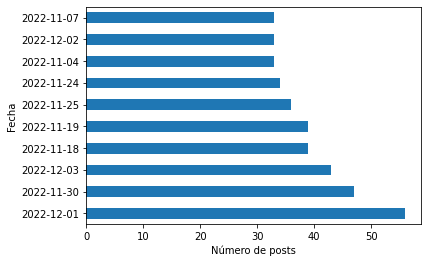

In [104]:
df['Fecha'].value_counts().head(10).plot.barh() 
plt.xlabel('Número de posts')
plt.ylabel('Fecha')

Horas de mayor interacción en el grupo

Text(0, 0.5, 'Hora')

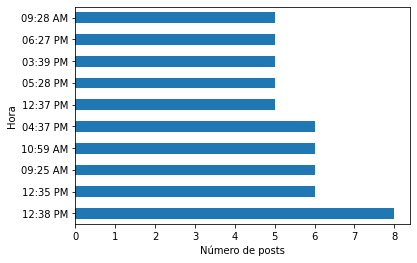

In [105]:
df['Hora'].value_counts().head(10).plot.barh() 
plt.xlabel('Número de posts')
plt.ylabel('Hora')

Cantidad de posts en el tiempo

In [112]:
df['Número Posts'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
df_date = df.groupby('Fecha').sum()
df_date.reset_index(inplace=True)

In [113]:
fig = px.line(df_date, x='Fecha', y='Número Posts')

fig.update_layout(
    title={'text': 'Cantidad de Posts vs Tiempo',
             'y':0.96,
             'x':0.5,
             'xanchor': 'center'}, 
    font=dict(
        size=17))
fig.update_xaxes(nticks=20)
fig.show()

Word Cloud de palabras más usadas

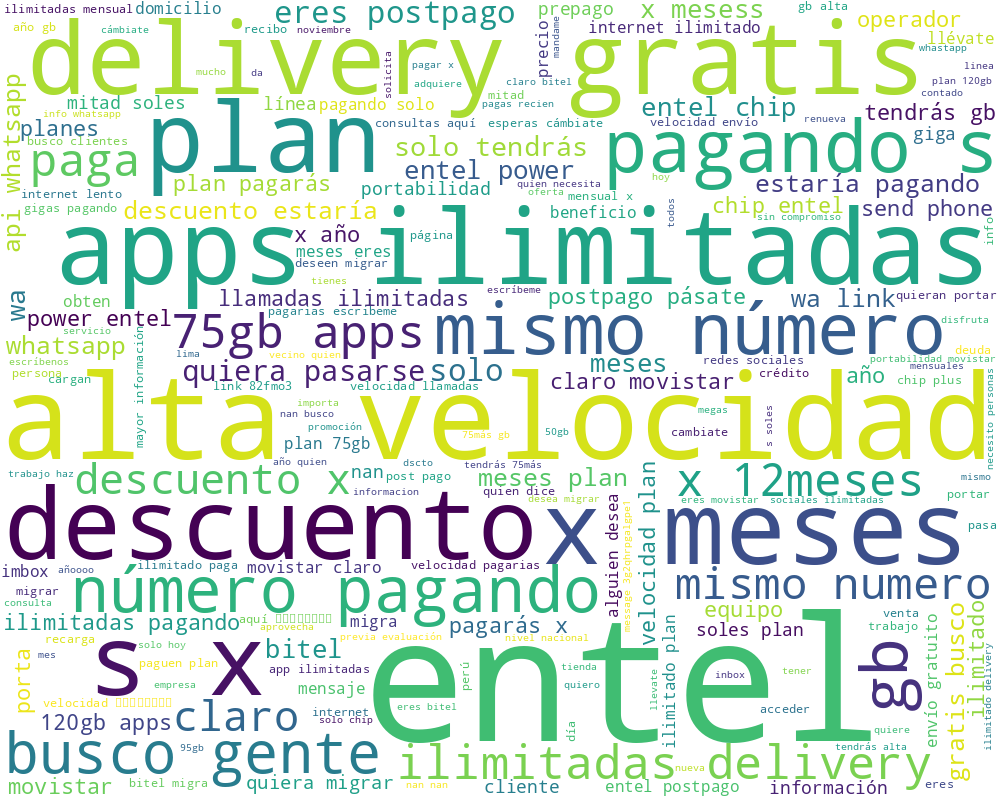

In [64]:
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es', 
                                                         'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic', 'nos', 'ya', 'hay', 'esta', 
                                                         'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https', 'tu', 'y', 'al',
                                                         'mi', 'tus', 'esa', 'o', 'sus', 'tiene', 'también', 'tambien', 'sea', 'esos', 'esto', 'ese',
                                                         'uno', 'ahi', 'ahí', 'va', 'está', 'yo', 'tenga', 'ser', 'otra', 'otro', 'mis', 'han'])

total_words = ' '

for texto in df['Texto_Post'].values:
  palabras = str(texto).lower().split()
  for palabra in palabras:
    total_words = total_words + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_words) 

wordcloud.to_image()